In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
from subprocess import check_output

In [20]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Data Science\Practical\NLP\Dataset\Sentiment.csv")

In [21]:
# here doing sentiment analysis on this dataset, therfore I dropped the unnecessary colunns, keeping only sentiment and text.

In [22]:
df = df[['text','sentiment']]
df

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [23]:
# Splitting the dataset into train and test set
train,test = train_test_split(df,test_size=0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]
train

,text,sentiment
5250,You'd think God had a role in running this cou...,Negative
1736,What should you do the day after last night's ...,Positive
10152,RT @goldietaylor: Commercial break! #GOPDebate...,Positive
6552,You know how your grandpa says something embar...,Negative
9856,RT @RWSurferGirl: I need to order another gree...,Negative
...,...,...
2312,Some would see it as radical but I liked @GovM...,Positive
7500,@sternnschool Who's the real illegal alien #GO...,Negative
2306,RT @AnneBayefsky: What was striking? @FoxNews ...,Negative
3670,RT @guypbenson: Good Rubio answer on immigrati...,Positive


In [24]:
train_pos = train[train.sentiment=='Positive']
train_pos = train['text']
train_neg = train[train.sentiment=='Negative']
train_neg = train_neg['text']

Positive words


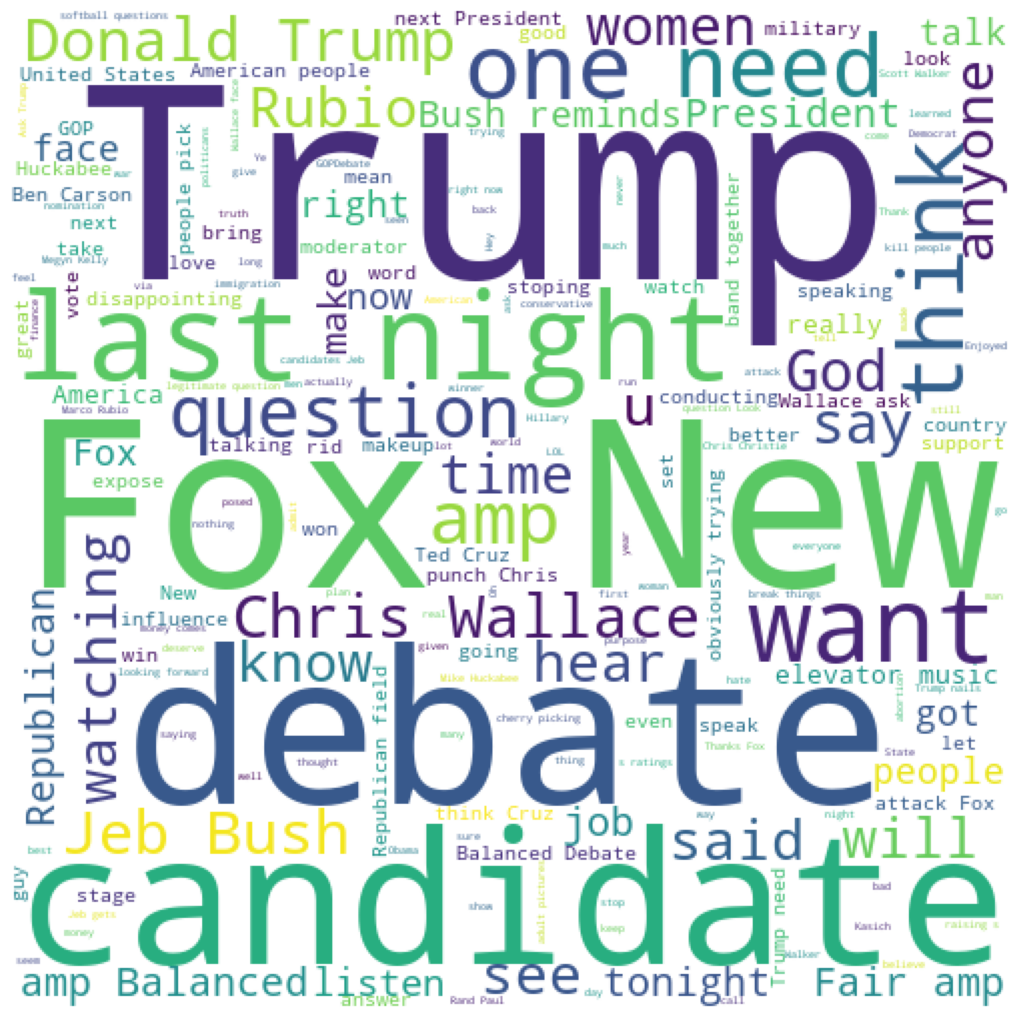

Negative words


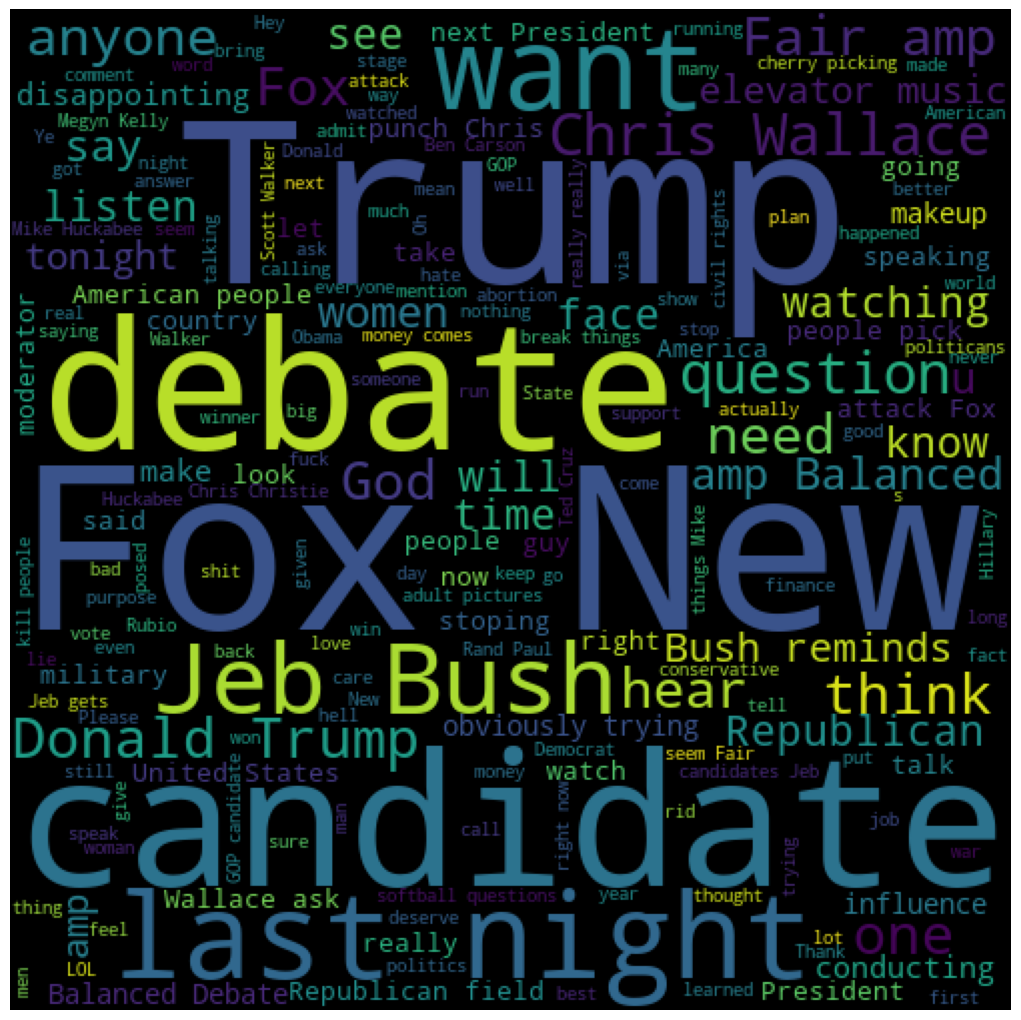

In [25]:
# defining function wordcloud_draw
def wordcloud_draw(df ,color = 'black'):
    words = ' '.join(df)
    cleaned_word = " ".join([word for word in words.split()   # cleaning the text
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=500,
                      height=500).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [54]:
tweets = []
# set of english stopwords
stopwords_set = set(stopwords.words("english"))
for index,row in train.iterrows():   # iterating every rows in train
    words_filtered = [e.lower() for e in row.text.split() if len(e)>=3]  # splitting text column data at space and taking lower case words of only those rows which has length >3 
    words_cleaned = [word for word in words_filtered  # cleaning the words
                        if 'http' not in word
                        and not word.startswith('#')
                        and not word.startswith('@')
                        and word!='RT']
    words_without_stopwords = [word for word in words_cleaned if not word # removing stopwords
                              in stopwords_set ]
    tweets.append((words_without_stopwords,row.sentiment))   # taking cleaned and without stopword data with sentiment column
    
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']


In [59]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [29]:
#Hereby I plotted the most frequently distributed words. The most words are centered around debate nights.

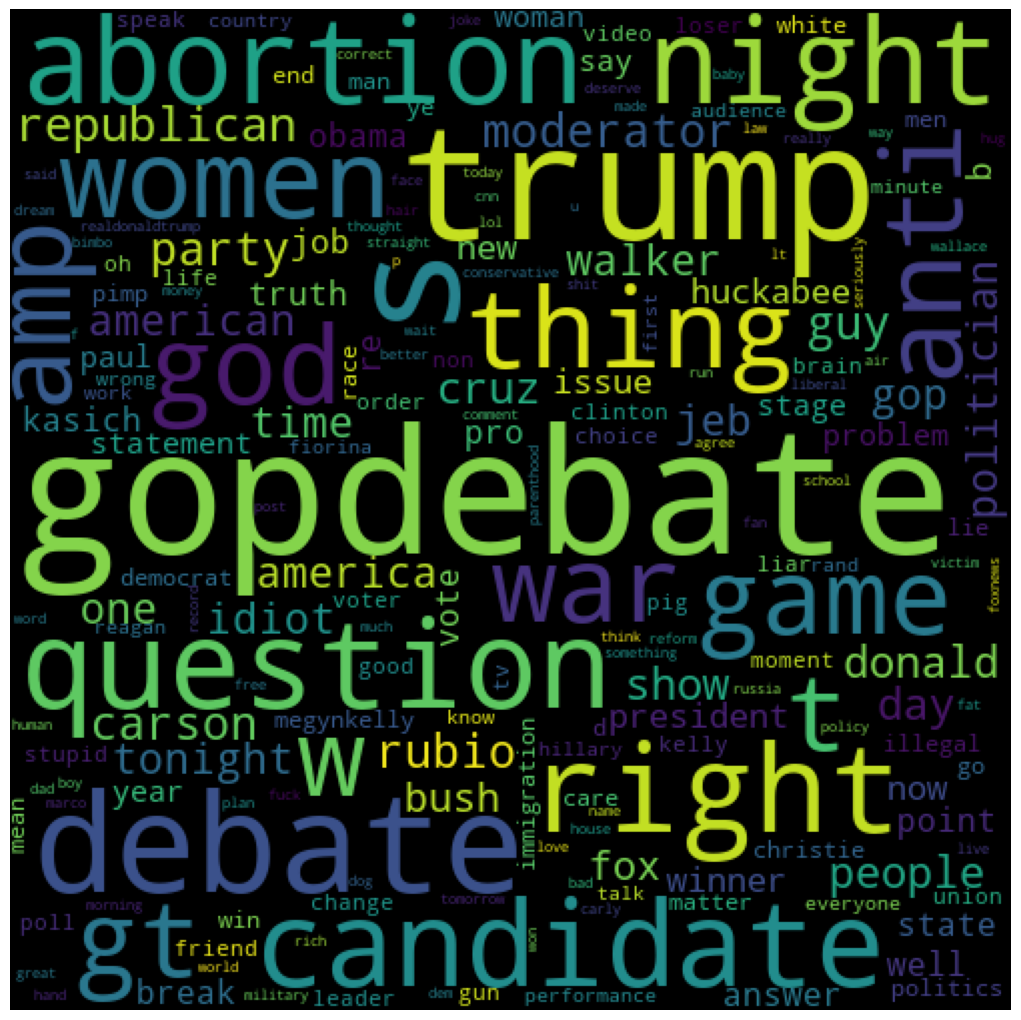

In [30]:
wordcloud_draw(w_features)

In [ ]:
#Using the nltk NaiveBayes Classifier I classified the extracted tweet word features.

In [60]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
# calculate negative and positive comment score

In [62]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))  

[Negative]: 836/791 
[Positive]: 221/75 


# Conclusion

In [ ]:

In my experience, it works rather well for negative comments. 
The problems arise when the tweets are ironic, sarcastic has reference or own difficult context.

Consider the following tweet: "Muhaha, how sad that the Liberals couldn't destroy Trump. Marching forward." 
As you may already thought, the words sad and destroy highly influences the evaluation, although this tweet 
should be positive when observing its meaning and context.

To improve the evalutation accuracy, we need something to take the context and references into consideration.
As my project 2.0, I will try to build an LSTM network, and benchmark its results compared to this nltk Machine Learning implementation. 
Stay tuned.